# Final Project
## Name: Goutham Nervavetla

### Question: Did the President of the United States of America became more negative on twitter over time in the last five years?

### Quality of Data: I used tweepy, csv, and time python modules to access twitter API for downloading tweets. Then saved those to a file. Because i used API, instead of scraping the webpage, i got perfect data with no errors. I ran the python code for collecting tweets outside jupiter notebook because it needs to wait long time between collecting tweets to not trigger time outs. I saved the code in "tweetgrabber.py" file.

### Following script uses a map reduce method to read each tweet from file, check the year for each tweet, get the positive and negative sentiment score for each tweet. Use that to get the average positive and negative sentiment score for each year's worth of tweets. Then store the average scores for each year in "posdict" and "negdict" dictionary.

In [43]:
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from dateutil import parser
import matplotlib.pyplot as plt

analyser = SentimentIntensityAnalyzer()
#source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
yearVar = 2019
#variables to keep track of sum of positive sentiments and negative sentiments
positiveSum = 0
negativeSum = 0
#counter to keep track of number of tweets. This is useful for calculating averages
counter = 0 
# dictionaries to store year:average_score pairs
posdict = {}
negdict = {}
#do a mapreduce operation to get average positive and negative sentiment scores
with open('tweetstore_2014_2019.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        dt = parser.parse(row[2])
        score = analyser.polarity_scores(row[1])
        if dt.year == yearVar:
            positiveSum = positiveSum+score.get("pos")
            negativeSum = negativeSum+score.get("neg")
            counter = counter + 1
        else:
            posdict[yearVar]=positiveSum/counter
            negdict[yearVar]=negativeSum/counter
            yearVar = dt.year
            counter = 0
            negativeSum = 0
            positiveSum = 0
print(posdict)
print(negdict)

{2019: 0.15982721382289403, 2018: 0.17749715504978666, 2017: 0.17946996931170536, 2016: 0.17860138848712762, 2015: 0.183349732262383}
{2019: 0.09766198704103661, 2018: 0.08450248933143674, 2017: 0.08528583954405962, 2016: 0.0809444605148974, 2015: 0.06923594377510031}


### Using the data from the "posdict" and "negdict" dictionaries from the cell above, following script plots the graph.

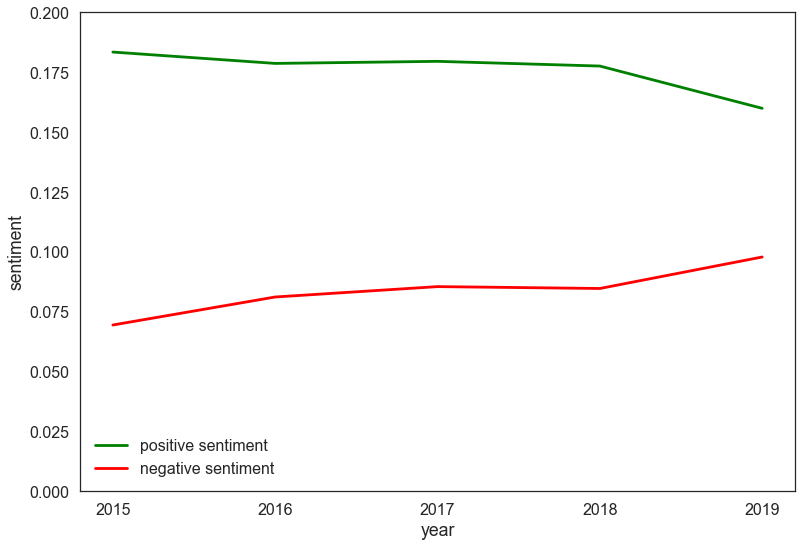

In [47]:
years = [2015, 2016, 2017, 2018, 2019]
pos = [posdict.get(2015),posdict.get(2016),posdict.get(2017),posdict.get(2018),posdict.get(2019)]
neg = [negdict.get(2015),negdict.get(2016),negdict.get(2017),negdict.get(2018),negdict.get(2019)]
plt.plot(years, pos, color='g', label="positive sentiment")
plt.plot(years, neg, color = 'r', label="negative sentiment")
plt.legend()
plt.ylim(0,0.2)
plt.xlabel("year")
plt.ylabel("sentiment")
plt.style.use('seaborn-poster')
plt.xticks(years)
plt.savefig("tweetgraph.png")

## Conclusion:

Based on the analysis of President's tweets over the last five years from January 1, 2015 to June 29 2019, it looks like he did get more negative as you can see with the rise in red line. On the contrary, positive sentiment score has fallen. This successfully reinforces my hypothesis. However, this would have been a stronger evidence if i could get all the tweets dating back to year 2009 to do my analysis. Longer trend lines usually give a better picture, but because my developer account was restricted as i made too many requests, i was unable to accomplish that. I might try again in the future to get the rest of the tweets to see if these trend lines still hold up.